In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve


%matplotlib inline
pd.set_option('max.columns', 100)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('/Users/ling/Desktop/ds_class/DS-SF-42/final_project/kag_risk_factors_cervical_cancer.csv')

## 1.Load in dataset and clean up data

In [4]:
df.shape
df.info()
df.head()
df.to_csv('/Users/ling/desktop/project_data_raw.csv')

#rename columns

df.columns = [['age', 'sexual_partners', 'first_sexual_intercourse', 'num_pregnancies', 'smokes', 'smoke_years',
              'smoke_packs_per_year', 'hormonal_contraceptives', 'hormonal_contraceptive_years', 'iud', 'iud_years',
               'stds', 'stds_number', 'std_condylomatosis', 'std_cervical_condylomatosis', 
               'std_vaginal_condylomatosis', 'std_vulvo_condylomatosis', 'std_syphilis', 'std_pelvic_inflam', 
               'std_genital_herpes', 'std_molluscum_contagiosum', 'std_aids', 'std_hiv', 'std_hepatitisb', 'std_hpv',
               'std_num_diagnosis', 'std_time_since_first_diagnosis','std_time_since_last_diagnosis', 'dx_cancer', 
               'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy']]

#rename ? to nan, convert objects to float


df = df.replace('?', np.nan)
df = df.convert_objects(convert_numeric=True)
df.info()
print df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [5]:
df.isnull().sum()

age                                 0
sexual_partners                    26
first_sexual_intercourse            7
num_pregnancies                    56
smokes                             13
smoke_years                        13
smoke_packs_per_year               13
hormonal_contraceptives           108
hormonal_contraceptive_years      108
iud                               117
iud_years                         117
stds                              105
stds_number                       105
std_condylomatosis                105
std_cervical_condylomatosis       105
std_vaginal_condylomatosis        105
std_vulvo_condylomatosis          105
std_syphilis                      105
std_pelvic_inflam                 105
std_genital_herpes                105
std_molluscum_contagiosum         105
std_aids                          105
std_hiv                           105
std_hepatitisb                    105
std_hpv                           105
std_num_diagnosis                   0
std_time_sin

In [6]:
#do all columns have values
df.sum(axis=0)

age                               23012.000000
sexual_partners                    2103.000000
first_sexual_intercourse          14463.000000
num_pregnancies                    1825.000000
smokes                              123.000000
smoke_years                        1030.664594
smoke_packs_per_year                382.906638
hormonal_contraceptives             481.000000
hormonal_contraceptive_years       1692.314401
iud                                  83.000000
iud_years                           381.470000
stds                                 79.000000
stds_number                         133.000000
std_condylomatosis                   44.000000
std_cervical_condylomatosis           0.000000
std_vaginal_condylomatosis            4.000000
std_vulvo_condylomatosis             43.000000
std_syphilis                         18.000000
std_pelvic_inflam                     1.000000
std_genital_herpes                    1.000000
std_molluscum_contagiosum             1.000000
std_aids     

In [7]:
#count nans in each column
df.isnull().sum()

#drop column with a lot of nans, columns with no values at all 
df = df.drop(['std_time_since_first_diagnosis', 'std_time_since_last_diagnosis', 'std_aids', 
              'std_cervical_condylomatosis'], axis=1)

df.isnull().sum()
len(df)

858

[(0, 668), (1, 723), (2, 728), (3, 742), (4, 751), (5, 752), (6, 752), (7, 753), (8, 753), (9, 753), (10, 753), (11, 753), (12, 757), (13, 757), (14, 760), (15, 763), (16, 838), (17, 853), (18, 855), (19, 858)]


,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,stds,stds_number,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.000000,1.0,3.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.000000,1.0,15.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.400000,0.0,0.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.000000,1.0,2.00,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,0,0
10,44,3.0,26.0,4.0,0.0,0.000000,0.000000,1.0,2.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
11,27,1.0,17.0,3.0,0.0,0.000000,0.000000,1.0,8.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


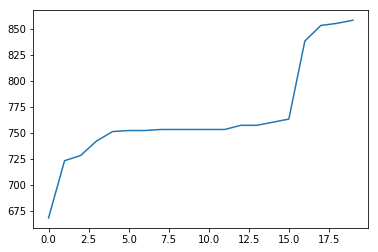

In [8]:
#drop rows with a lot of missing values
#decide to drop rows missing more than 3 values
count = []

missing_values = range(0,20)

for number in missing_values:
    count.append(858-len(df[df.isnull().sum(axis=1) > number]))

print zip(missing_values,count)
plt.plot(missing_values,count)

df = df[df.isnull().sum(axis=1) < 1]
df

In [9]:
#drop columns that are collinear? 

df = df.drop(['stds', 'stds_number'], axis=1)

df.isnull().sum()

age                             0
sexual_partners                 0
first_sexual_intercourse        0
num_pregnancies                 0
smokes                          0
smoke_years                     0
smoke_packs_per_year            0
hormonal_contraceptives         0
hormonal_contraceptive_years    0
iud                             0
iud_years                       0
std_condylomatosis              0
std_vaginal_condylomatosis      0
std_vulvo_condylomatosis        0
std_syphilis                    0
std_pelvic_inflam               0
std_genital_herpes              0
std_molluscum_contagiosum       0
std_hiv                         0
std_hepatitisb                  0
std_hpv                         0
std_num_diagnosis               0
dx_cancer                       0
dx_cin                          0
dx_hpv                          0
dx                              0
hinselmann                      0
schiller                        0
citology                        0
biopsy        

In [10]:
df.to_csv('/Users/ling/desktop/project_data2.csv')

In [11]:
#either drop columns with nan or replace with median/most common value 

#1. Option 1, drop columns with na value. this would get 668 results 
# df = df.dropna(how='any')

#2. Option 2, fill valuew with the median value. 

columns = df.columns

for col in columns:
    df = df
    df[col] = df[col].fillna(df[col].median())

print df.shape
df.isnull().sum()


(668, 30)


age                             0
sexual_partners                 0
first_sexual_intercourse        0
num_pregnancies                 0
smokes                          0
smoke_years                     0
smoke_packs_per_year            0
hormonal_contraceptives         0
hormonal_contraceptive_years    0
iud                             0
iud_years                       0
std_condylomatosis              0
std_vaginal_condylomatosis      0
std_vulvo_condylomatosis        0
std_syphilis                    0
std_pelvic_inflam               0
std_genital_herpes              0
std_molluscum_contagiosum       0
std_hiv                         0
std_hepatitisb                  0
std_hpv                         0
std_num_diagnosis               0
dx_cancer                       0
dx_cin                          0
dx_hpv                          0
dx                              0
hinselmann                      0
schiller                        0
citology                        0
biopsy        

In [12]:
df.to_csv('/Users/ling/desktop/project_data2.csv')

In [13]:
df.head(10)

,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,0,0
10,44,3.0,26.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
11,27,1.0,17.0,3.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


## 2. EDA

In [14]:
df.describe()

,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,0.530030,0.055389,0.005988,0.053892,0.022455,0.001497,0.001497,0.001497,0.019461,0.001497,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,2.001308,0.228910,0.077208,0.225974,0.148269,0.038691,0.038691,0.038691,0.138242,0.038691,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


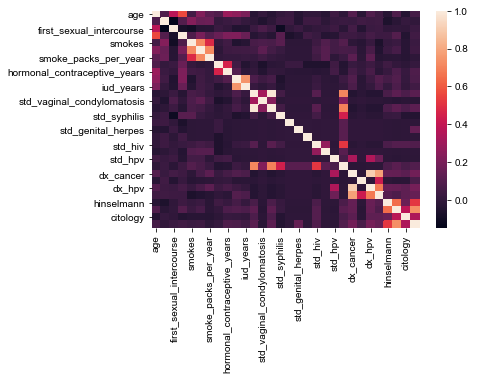

In [15]:
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(40,40)})

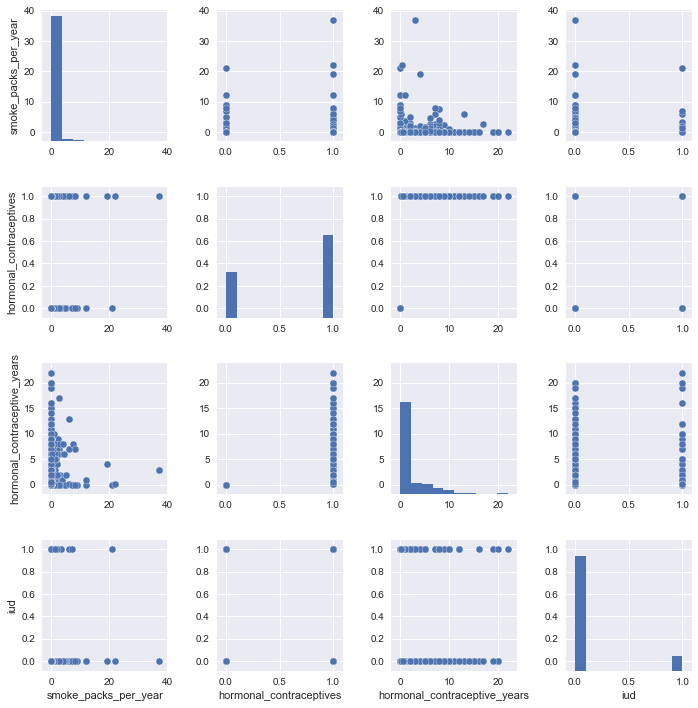

In [16]:
sns.pairplot(df.iloc[:, 6:10])

/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


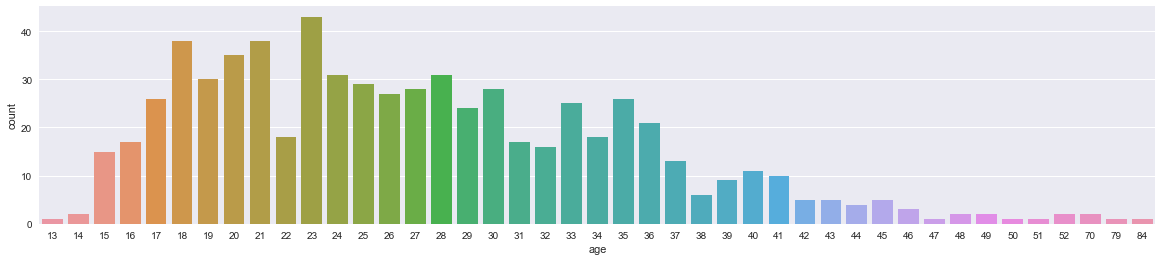

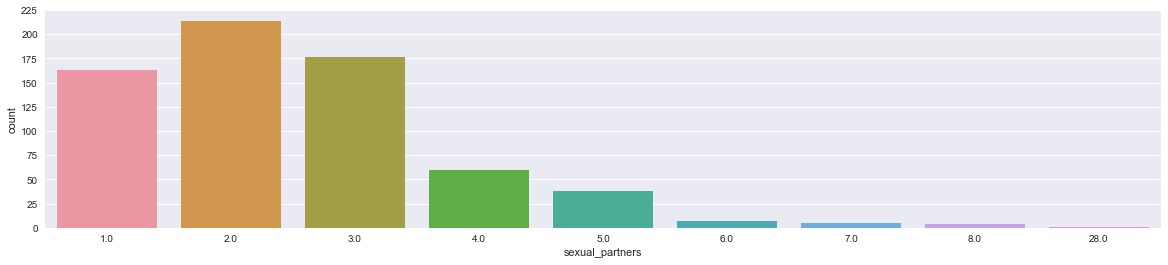

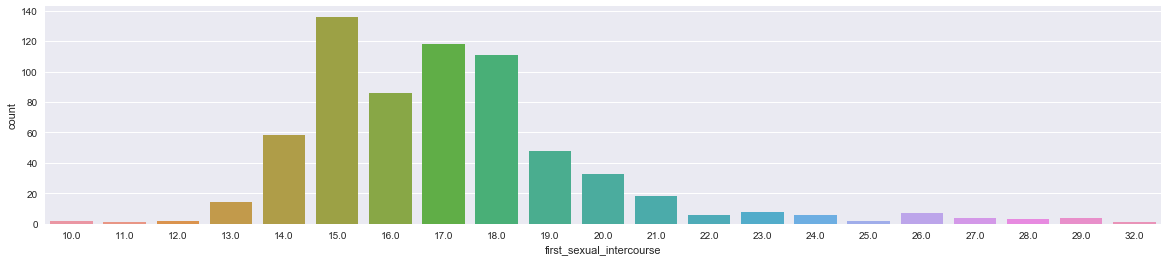

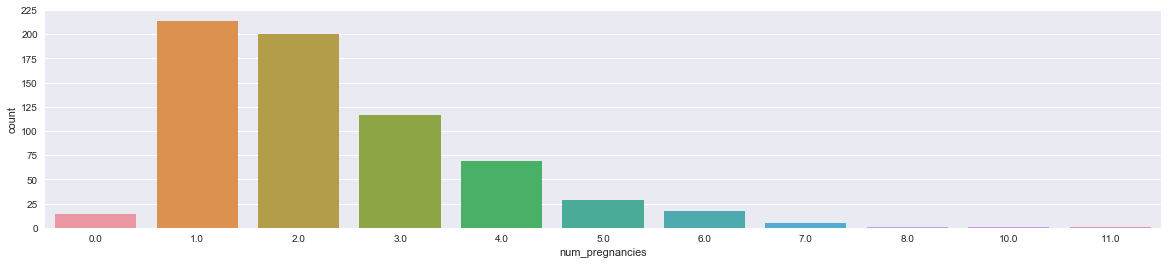

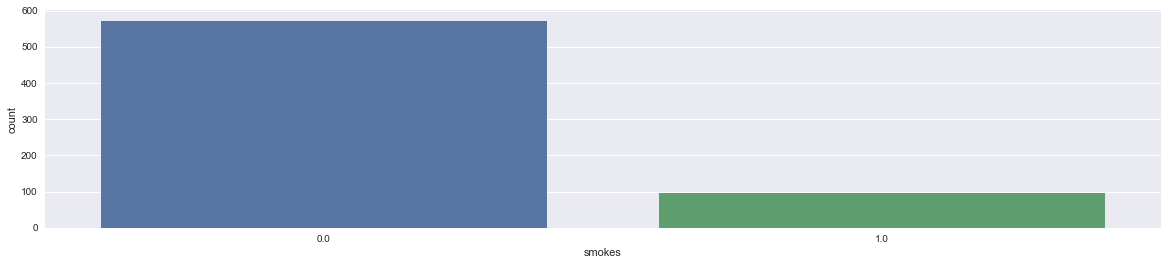

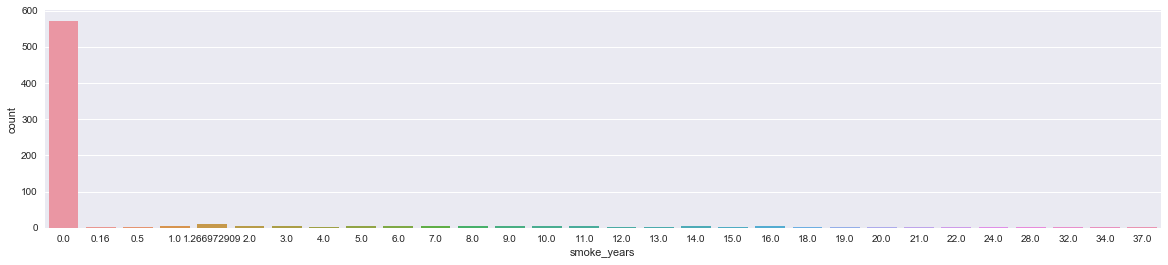

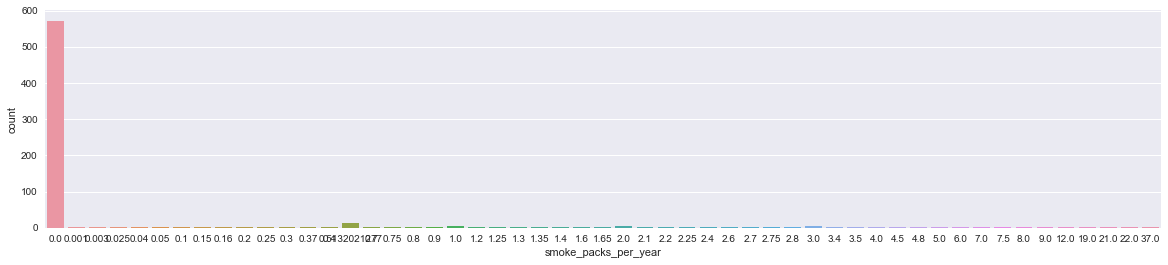

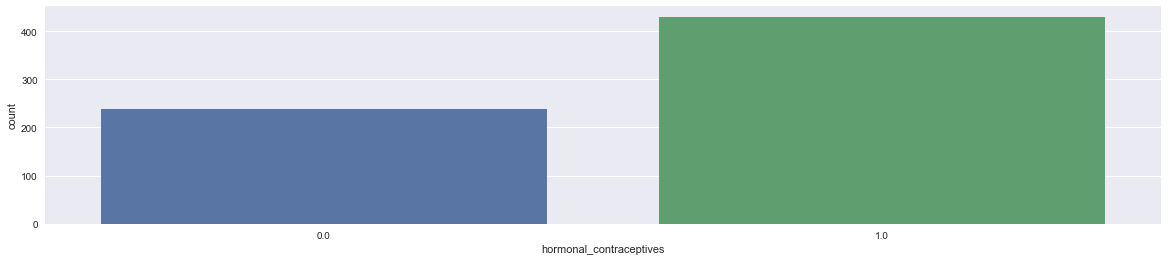

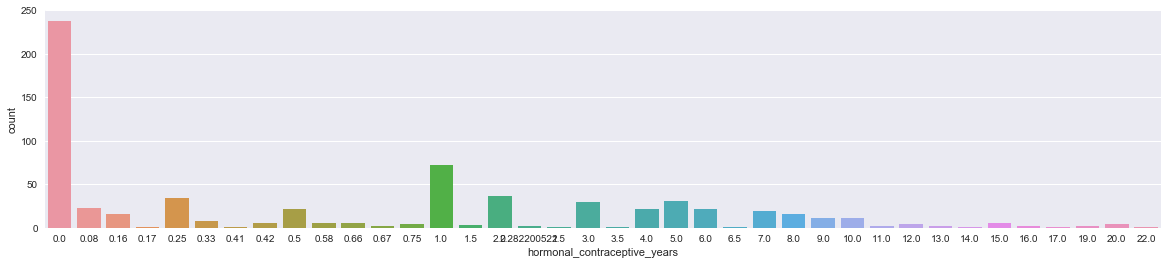

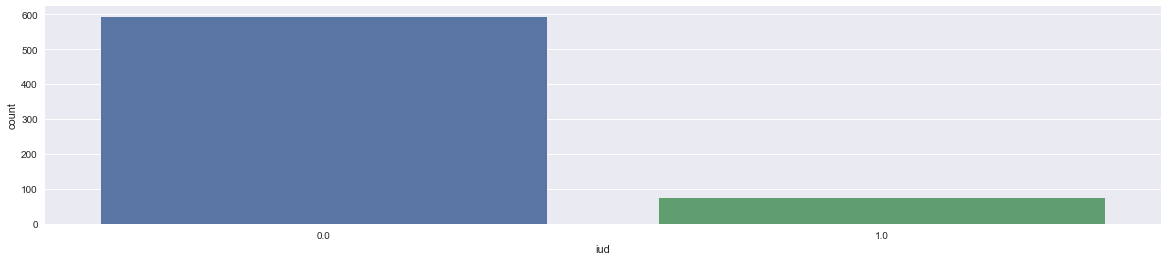

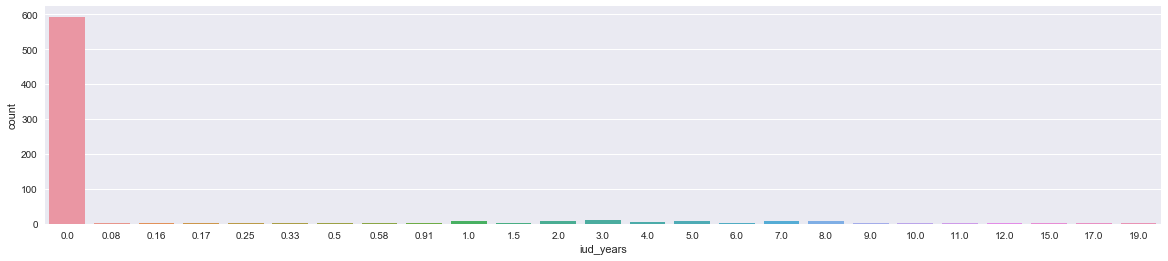

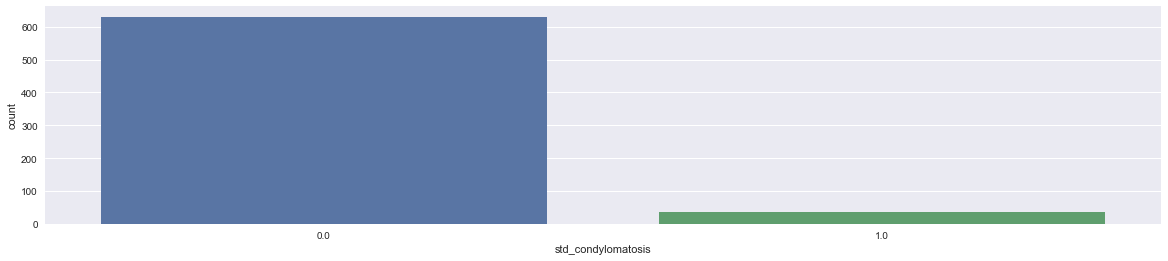

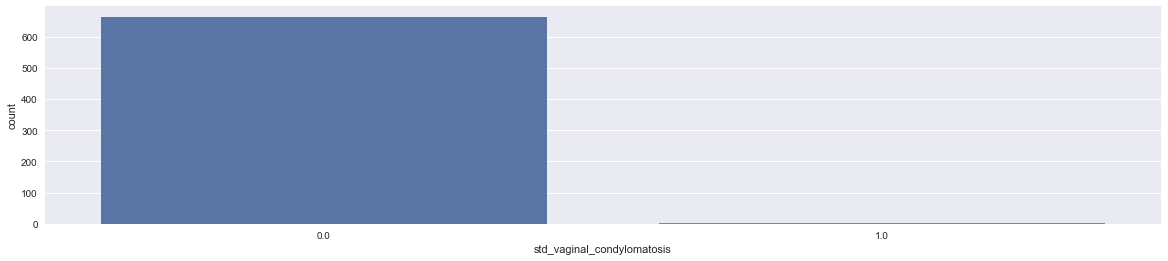

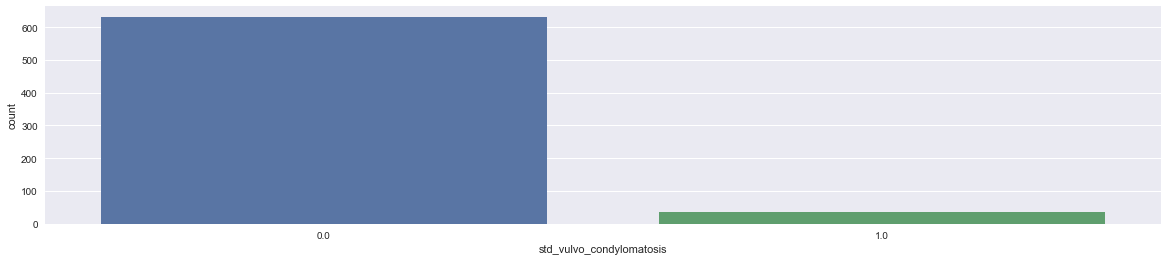

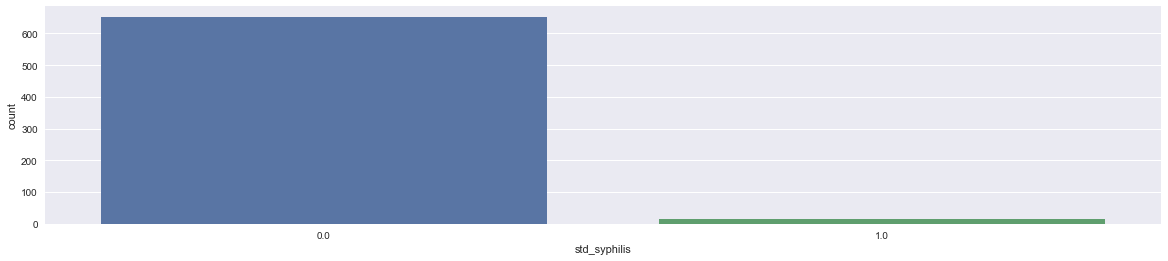

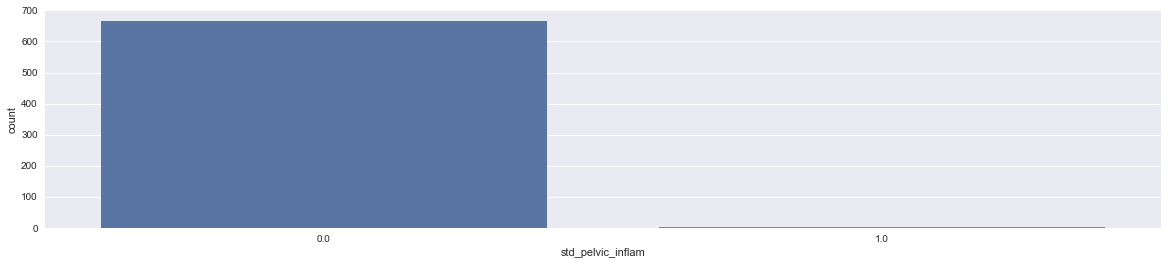

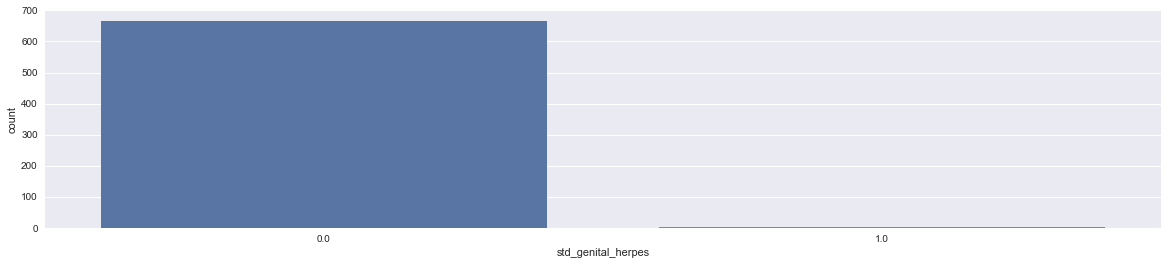

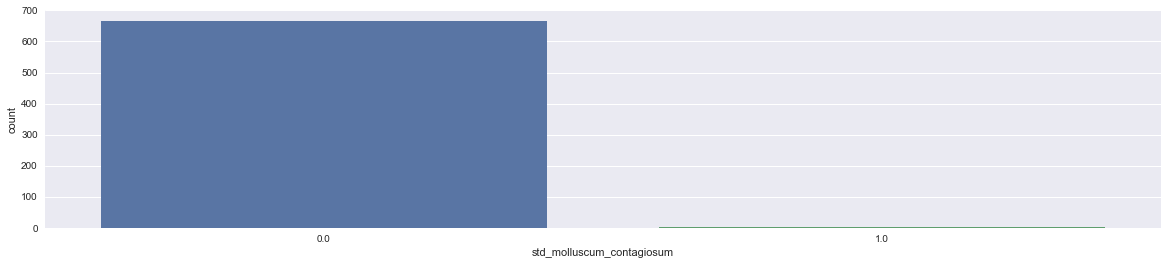

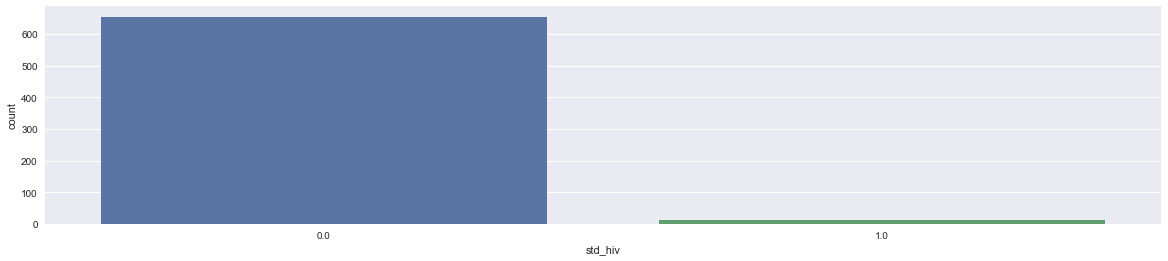

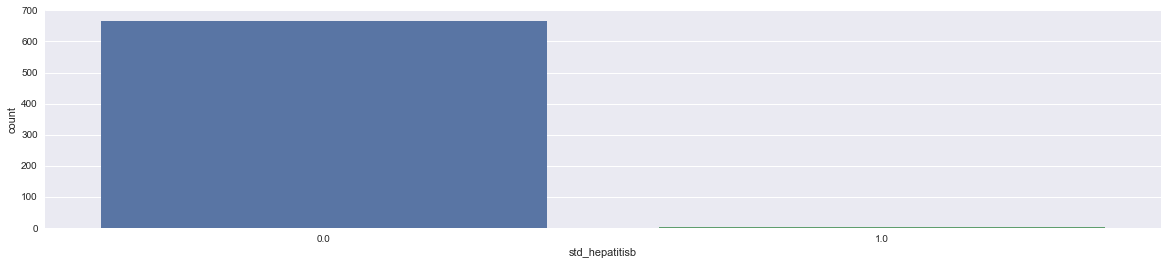

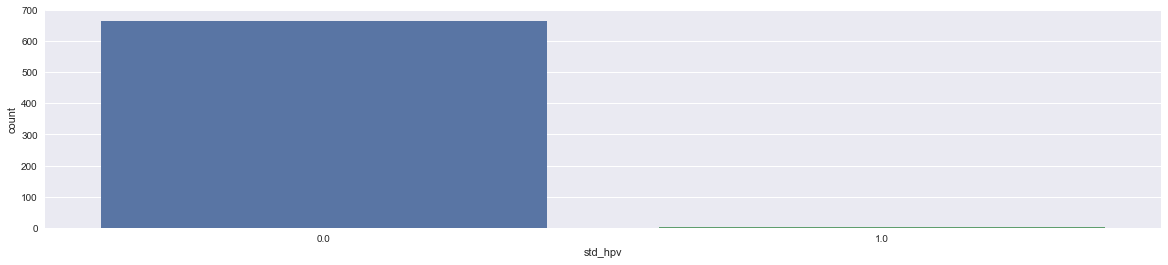

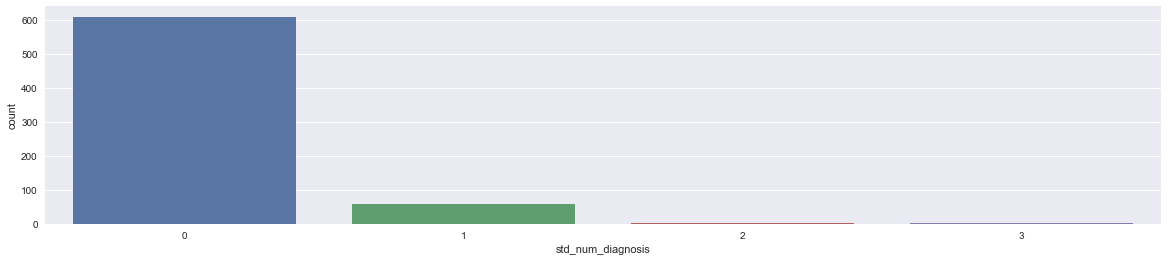

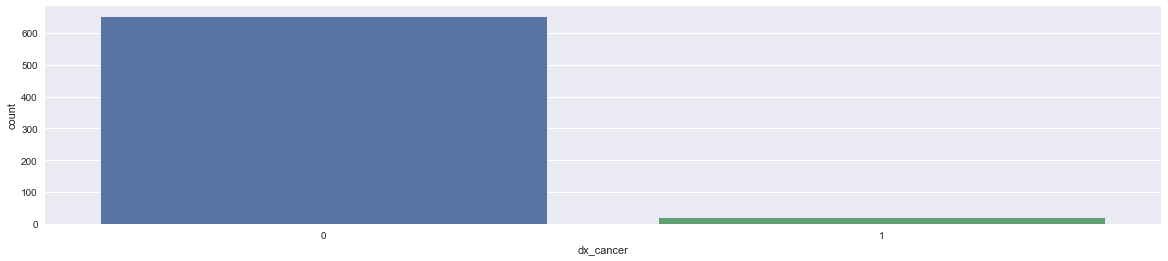

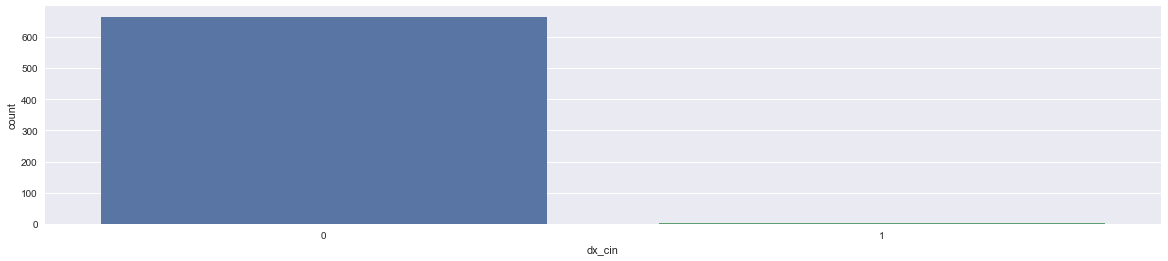

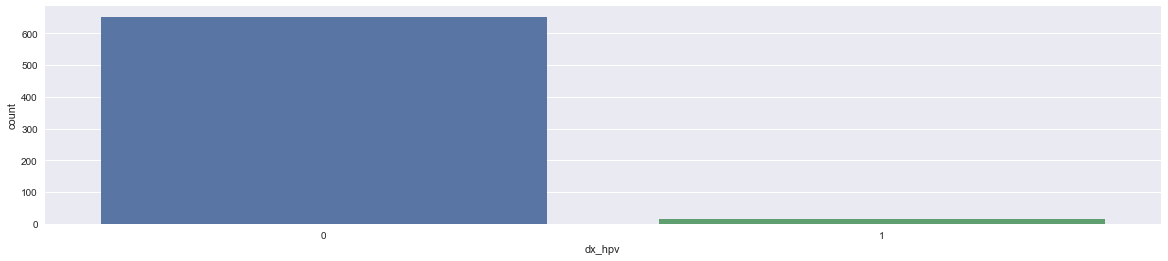

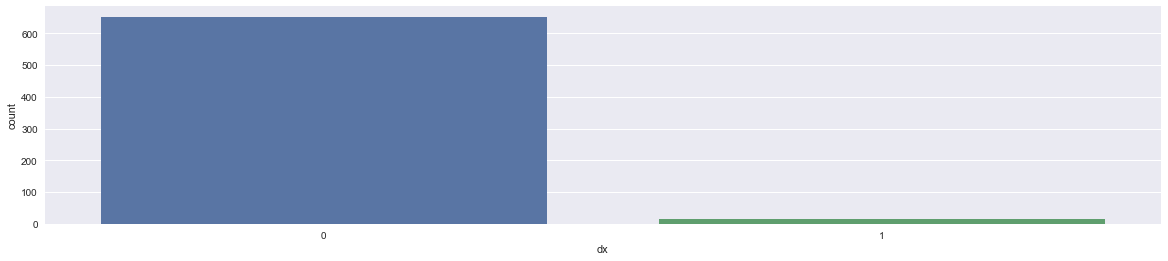

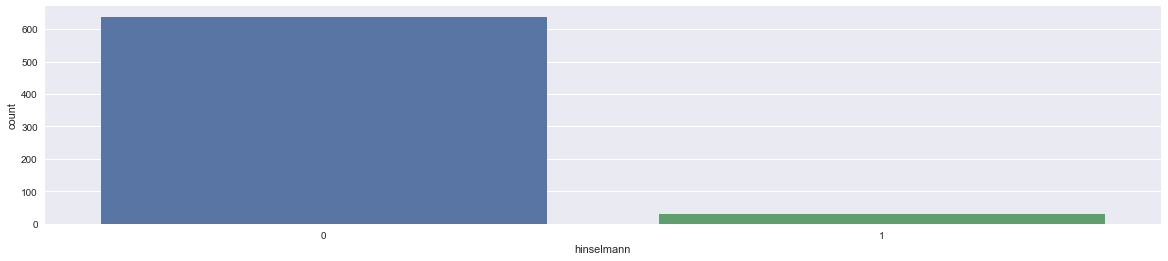

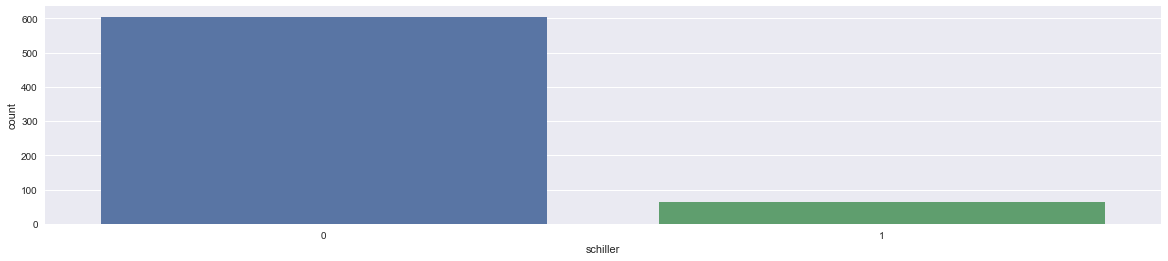

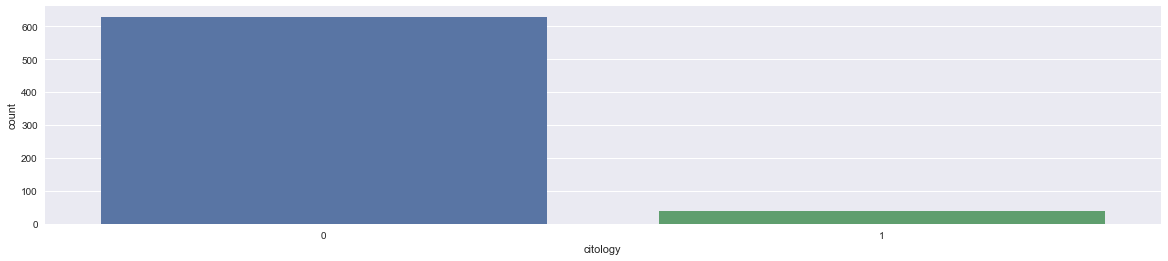

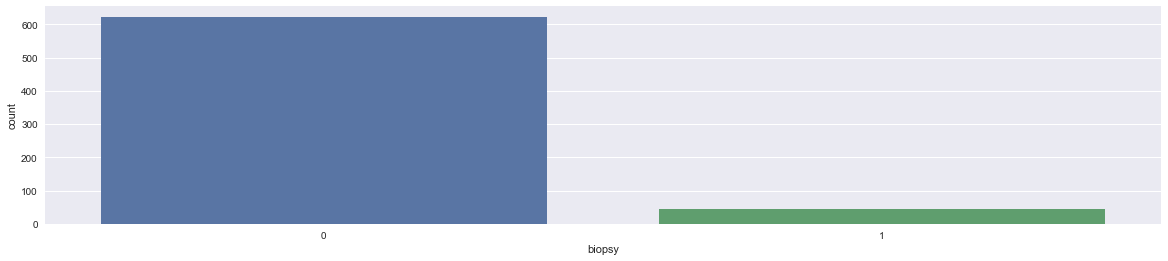

In [17]:
plot_cols = df.columns


for col in plot_cols:
    plt.subplots(figsize=(20,4))
    sns.countplot(x=col, data=df)

## 3. Model!

In [18]:
X = df.drop(['hinselmann', 'schiller', 'citology', 'biopsy'], axis=1)
Y = df['biopsy']

In [19]:
Y.value_counts(normalize=True) 

#no dropping any rows. NUll Accuracy is .9358
#drop anything > 3 NAs. NULL accuracy is .9285

0    0.932635
1    0.067365
Name: biopsy, dtype: float64

1.Logistic Regression

In [20]:
#Logistic Regression Model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log = linear_model.LogisticRegression()
log.fit(X_scaled,Y)
print 'model_score:', log.score(X_scaled,Y)
log_cv_scores = cross_val_score(log, X, Y, cv = 5, scoring = 'accuracy')
print 'cross validation score:', log_cv_scores.mean()

#log.predict(X)

#interpret the coefficients 
coef = pd.DataFrame(zip(X.columns, np.transpose(log.coef_[0])), columns = ['coef', 'value'])
coef['odds_ratio'] = np.e**(coef['value'])
coef.sort_values('odds_ratio', ascending=False).head()

model_score: 0.938622754491
cross validation score: 0.919144877118


,coef,value,odds_ratio
22,dx_cancer,0.406972,1.502263
18,std_hiv,0.345482,1.412671
16,std_genital_herpes,0.344422,1.411174
23,dx_cin,0.292665,1.339994
24,dx_hpv,0.280306,1.323534


In [21]:
y_pred_log = log.predict(X)
cm = confusion_matrix(Y,y_pred_log)
pd.crosstab(Y, y_pred_log)
#true negative is 565
#true positive is 12
#false negative is 33
#false positive is 58

col_0,0,1
biopsy,,
0,565,58
1,33,12


In [22]:
#Eliminate False Negative (incorrect negative prediction)
#False Positive is alright (just test again )
print 'TPR:', cm[1,1]/float(cm.sum(axis=1)[1])
print 'TNR:', cm[0,0]/float(cm.sum(axis=1)[0])
print 'FNR:', cm[1,0]/float(cm.sum(axis=1)[1]) #THIS IS HIGH 
print 'FPR:', cm[0,1]/float(cm.sum(axis=1)[0])

TPR: 0.266666666667
TNR: 0.906902086677
FNR: 0.733333333333
FPR: 0.0930979133226


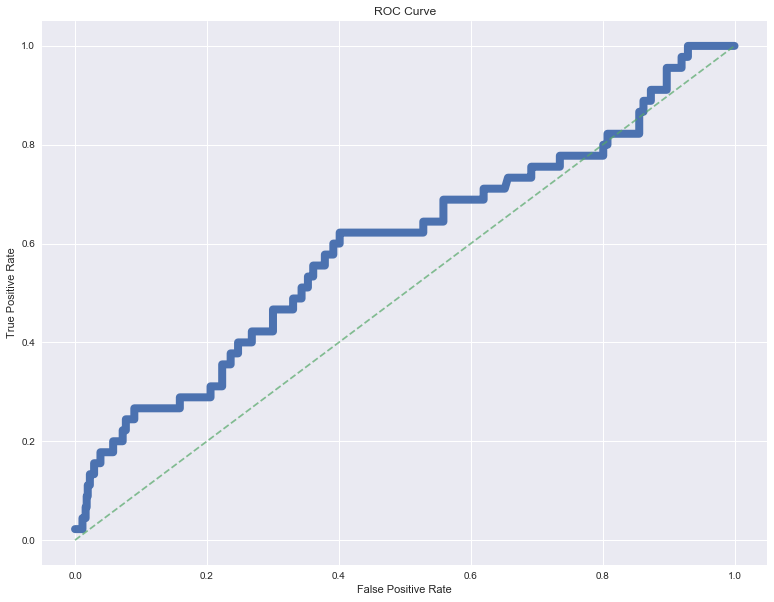

ROC: 0.595166755841
Cross Val ROC: 0.540301792115


In [23]:
test_probs = log.predict_proba(X)[:,1]
fpr, tpr, thres = roc_curve(Y, test_probs)
thres[::5]
plt.figure(figsize=(13,10))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print 'ROC:', roc_auc_score(Y, test_probs)
print 'Cross Val ROC:', cross_val_score(log, X,Y,cv = 5, scoring='roc_auc').mean()

2.Decsion Tree

In [24]:
#max cepth
# criterion -- gini or entropy 

model_type = 'gini'

dt = DecisionTreeClassifier(max_depth = 1, criterion=model_type)
dt.fit(X,Y)

print 'model_score:', dt.score(X,Y)
dt_cv_scores = cross_val_score(dt, X, Y, cv=5, scoring='accuracy').mean()
print 'cross validation score:', dt_cv_scores

cols = pd.DataFrame(list(zip(X.columns, dt.feature_importances_)),
                    columns = ['features', 'importance'])

cols.sort_values('importance', ascending=False).head()



model_score: 0.932634730539
cross validation score: 0.925115026372


,features,importance
24,dx_hpv,1.0
0,age,0.0
1,sexual_partners,0.0
23,dx_cin,0.0
22,dx_cancer,0.0


In [25]:
tree_preds = dt.predict(X)
print tree_preds

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[(0.92361126697340357, 1), (0.91015598698238132, 3), (0.91015598698238132, 2), (0.89062955897205709, 4), (0.88763326226012784, 5), (0.88315565031982945, 7), (0.88164066883626968, 8), (0.87866681629446752, 6), (0.87268544495567268, 9), (0.86963303781842671, 10), (0.86670407361687796, 14), (0.8666816294467512, 11), (0.86665918527662433, 13), (0.85624509033778473, 12), (0.85323757154079227, 15), (0.85027494108405333, 19), (0.84722253394680735, 16), (0.84274492200650886, 17), (0.84125238469307584, 18), (0.83528223543934454, 20)]


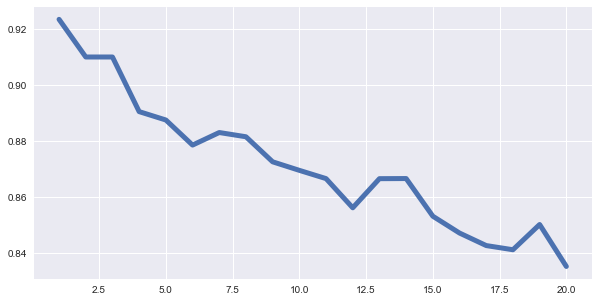

In [26]:
#find the best max depth

depth = range(1,21)
cv_scores = []

for i in depth:
    dt_cv = cross_val_score(DecisionTreeClassifier(max_depth=i), X, Y, cv=5, scoring='accuracy').mean()
    cv_scores.append(dt_cv)

print sorted(zip(cv_scores, depth), reverse=True)

plt.figure(figsize=(10,5))
plt.plot(depth, cv_scores, linewidth=5)
plt.show()

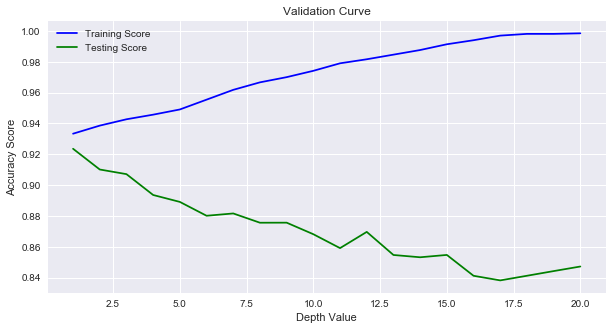

In [27]:
#Validation Curve
train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
                                            X, Y, param_name = 'max_depth', 
                                            param_range = depth,
                                            cv = 5, scoring = 'accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(depth, train_mean, label='Training Score', color='blue')
plt.plot(depth, test_mean, label ='Testing Score', color='green')


plt.title('Validation Curve')
plt.xlabel('Depth Value')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

3.Random Forest

In [28]:
rfe = RandomForestClassifier(n_estimators=770, max_features=2, max_depth=6)
rfe.fit(X,Y)
print 'model score:', rfe.score(X,Y)

rfe_cv_scores = cross_val_score(rfe, X, Y, cv=5, scoring='accuracy').mean()
print 'cross validation score:', rfe_cv_scores

pd.DataFrame({'feature':X.columns, 
              'importance':rfe.feature_importances_}).sort_values('importance', ascending = False).head(10)

y_pred = rfe.predict(X)
print y_pred

#n_estimators=80, max_features=1, max_depth=1: model score: 0.935897435897, cross validation score: 0.935896912825
#n_estimators=60, max_features=3, max_depth=3: model score: 0.935897435897, cross validation score: 0.935896912825

model score: 0.940119760479
cross validation score: 0.931130063966
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

[(0.926641229940523, 250), (0.926641229940523, 50), (0.92514869262709021, 530), (0.92513747054202666, 770), (0.92513747054202666, 570), (0.92513747054202666, 410), (0.92513747054202666, 170), (0.92512624845696334, 10), (0.92363371114353043, 650), (0.92363371114353043, 610), (0.9221299517450342, 730), (0.9221299517450342, 690), (0.9221299517450342, 450), (0.9221299517450342, 370), (0.9221299517450342, 290), (0.9221299517450342, 210), (0.9221299517450342, 90), (0.92063741443160141, 330), (0.91913365503310518, 130), (0.91764111771967227, 490)]


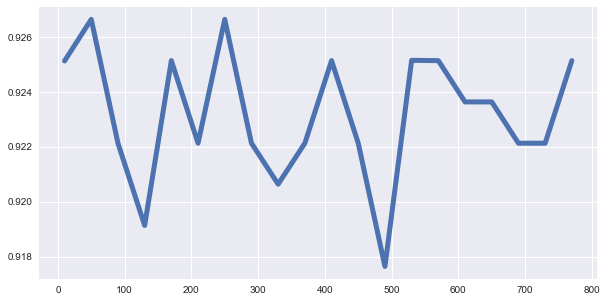

In [29]:
#tune estimators - number of trees. max is the number of rows
estimator_range = range(10,800,40)

rfe_cv_scores_estimator = []

for estimator in estimator_range:
    rfe_cv_e = cross_val_score(RandomForestClassifier(n_estimators=estimator), X, Y, cv=5, scoring='accuracy').mean()
    rfe_cv_scores_estimator.append(rfe_cv_e)

#print sorted(zip(estimator_range, rfe_cv_scores_estimator),key=lambda x: x[1],reverse=True)[0]
print sorted(zip(rfe_cv_scores_estimator, estimator_range), reverse=True)

plt.figure(figsize=(10,5))
plt.plot(estimator_range, rfe_cv_scores_estimator, linewidth=5)
plt.show()

[(0.93263382336438094, 2), (0.93263382336438094, 1), (0.93113006396588482, 3), (0.92963752665245214, 4), (0.926641229940523, 25), (0.92513747054202677, 20), (0.92513747054202677, 10), (0.92364493322859398, 29), (0.92364493322859398, 14), (0.92363371114353043, 39), (0.92216361800022439, 26), (0.92215239591516107, 23), (0.9221299517450342, 15), (0.9221299517450342, 5), (0.92064863651666473, 32), (0.92064863651666473, 9), (0.91916732128829537, 18), (0.91915609920323205, 12), (0.91915609920323182, 34), (0.9191448771181685, 30), (0.9191448771181685, 24), (0.9191448771181685, 11), (0.91912243294804186, 13), (0.91911121086297842, 31), (0.91911121086297842, 19), (0.91911121086297842, 6), (0.91767478397486246, 37), (0.91765233980473582, 21), (0.9176186735495454, 16), (0.91617102457636634, 35), (0.91613735832117604, 22), (0.91465604309280657, 28), (0.91463359892267992, 27), (0.91462237683761649, 7), (0.91459993266748962, 8), (0.91318594994950053, 36), (0.91167096846594098, 33), (0.91164852429581

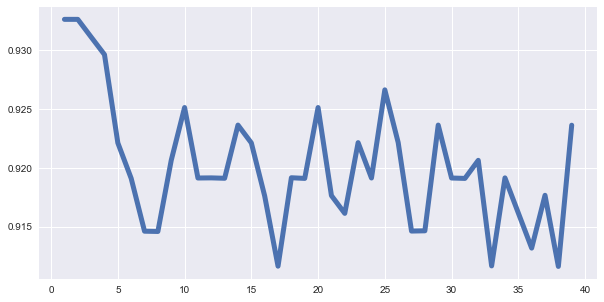

In [30]:
#tune max depth

depth = range(1,40)
rfe_cv_scores_depth = []

for i in depth:
    rfe_cv_d = cross_val_score(RandomForestClassifier(max_depth=i), X, Y, cv=5, scoring='accuracy').mean()
    rfe_cv_scores_depth.append(rfe_cv_d)

#print sorted(zip(depth, rfe_cv_scores_depth))[0]
print sorted(zip(rfe_cv_scores_depth, depth), reverse=True)

plt.figure(figsize=(10,5))
plt.plot(depth, rfe_cv_scores_depth, linewidth=5)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[(0.93263382336438094, 1), (0.93113006396588482, 3), (0.92963752665245214, 4), (0.92962630456738859, 2), (0.92813376725395591, 6), (0.92663000785545968, 5), (0.91911121086297842, 11), (0.91911121086297842, 8), (0.91911121086297842, 7), (0.9161149141510494, 12), (0.9161149141510494, 9), (0.91610369206598585, 10), (0.91463359892267992, 15), (0.91163730221075079, 16), (0.91014476489731799, 13), (0.91013354281225456, 14), (0.90864100549882176, 17), (0.90566715295701949, 25), (0.90566715295701949, 23), (0.90566715295701949, 22), (0.90566715295701949, 21), (0.90566715295701949, 18), (0.90416339355852315, 26), (0.90416339355852315, 24), (0.90416339355852315, 20), (0.90416339355852315, 19)]


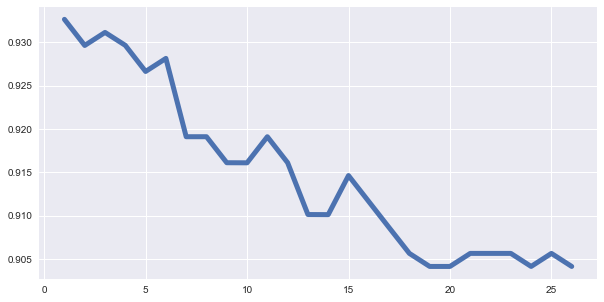

In [31]:
#tune max features
feature_range = range(1, len(X.columns) + 1)
rfe_cv_scores_range = []

print feature_range

for features in feature_range:
    rfe_cv_r = cross_val_score(RandomForestClassifier(max_features=features, max_depth=6, n_estimators=770), X, Y, cv=5, scoring='accuracy').mean()
    rfe_cv_scores_range.append(rfe_cv_r)

#print sorted(zip(feature_range, rfe_cv_scores_range))[0]
print sorted(zip(rfe_cv_scores_range, feature_range), reverse=True)

plt.figure(figsize=(10,5))
plt.plot(feature_range, rfe_cv_scores_range, linewidth=5)
plt.show()



In [32]:
#threshold?
#tune model type 

4.Adaboost

In [33]:
ada = AdaBoostClassifier(n_estimators=5)
ada.fit(X,Y)
print 'model_score:', ada.score(X,Y)
print 'cross val score:', cross_val_score(ada,X,Y, cv=5, scoring='accuracy').mean()
ada.predict(X)

model_score: 0.931137724551
cross val score: 0.929648748738


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

[(0.93264504544944449, 10),
 (0.93114128605094826, 9),
 (0.93114128605094826, 7),
 (0.93114128605094826, 6),
 (0.92964874873751546, 5),
 (0.92964874873751546, 4),
 (0.92963752665245214, 8),
 (0.9251150263718998, 2),
 (0.9251150263718998, 1),
 (0.92062619234653797, 3)]

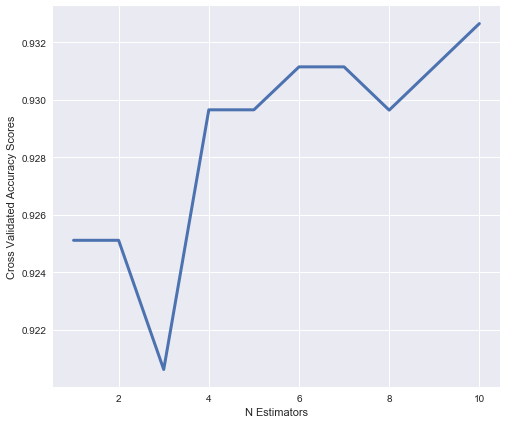

In [34]:
estimators = range(1, 11, 1)
estimators

cv_scores=[]

for est in estimators:
    ada = AdaBoostClassifier(n_estimators = est)
    score = cross_val_score(ada, X, Y, cv=5, scoring = 'accuracy').mean()
    cv_scores.append(score)

plt.figure(figsize= (8, 7))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");

sorted(zip(cv_scores, estimators), reverse=True)